# **Individual Project - Medhi Balouka**
Acoustic Features Modeling.
---

Objective: Create a model taht will determine the Class - emotions - of the person, based on all features knowing our target will be class, the emotion (sad, angry,...).

Therefore we will used all columns to predict this, and try to model the acoustic features.

##Initialization

In [ ]:
# Import Libraries
import tensorflow as tf # Tensorflo -> Tool used & released for neural network ->
from tensorflow import keras # Keras -> Neural network achitecture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # Label Encoding
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import Dataset
data_path='/content/drive/MyDrive/Session 2/Acoustic Features.csv'
data_pd = pd.read_csv(data_path, delimiter=',', header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Separate features and labels
x_data = data_pd.iloc[:, 1:].values  # All columns except the first
y_data = data_pd.iloc[:, 0].values  # First column

# Check for NaN or infinite values in features
assert np.isfinite(x_data).all(), "Features contain NaN or infinite values."

print(y_data)

['relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax' 'relax'
 'relax' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'h

In [233]:
# Verify y shape
y_data.shape

(400,)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(y_data)
y_data = label_encoder.transform(y_data)

### Train-Test Split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_data, y_data, test_size=0.35, random_state=26, stratify=y_data)

# Debugging: Print shapes to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (260, 50)
y_train shape: (260,)
x_valid shape: (140, 50)
y_valid shape: (140,)


# Models Analysis

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU

## **Adjusted Model 1: Single Hidden Layer**

In [234]:
# Model 1: One hidden layer with 4 neurons
model_1 = Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),  # Assuming input shape matches number of features
    keras.layers.Dense(4, activation='relu', kernel_initializer='he_normal'),  # Single hidden layer with 4 neurons
    keras.layers.Dense(4, activation='softmax')  # Output layer for multi-class classification with 3 neurons = N matches the number of unique classes
])

In [236]:
# Compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # As Cross Classification
                metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
                        epochs=50,  # Adjust the number of epochs as necessary
                        validation_data=(x_valid, y_valid),
                        batch_size=32)  # Batch size of 32 is a common choice; adjust as needed

Epoch 1/50
9/9 [==============================] - 1s 29ms/step - loss: 70.6979 - accuracy: 0.2808 - val_loss: 54.3854 - val_accuracy: 0.3857
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 66.7746 - accuracy: 0.3115 - val_loss: 51.6588 - val_accuracy: 0.3643
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 64.4522 - accuracy: 0.2962 - val_loss: 48.4697 - val_accuracy: 0.3429
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 61.4155 - accuracy: 0.2692 - val_loss: 48.1248 - val_accuracy: 0.3643
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 56.3074 - accuracy: 0.2808 - val_loss: 42.9545 - val_accuracy: 0.3714
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 53.6519 - accuracy: 0.3077 - val_loss: 41.0772 - val_accuracy: 0.3786
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 50.4082 - accuracy: 0.2654 - val_loss: 38.7321 - val_accuracy: 0.3714
Epoch 8/50
9/9 [===

## ** Adjusted Model 2: Two Hidden Layers with LeakyReLU and ReLU**


In [237]:
# Model 2: Two hidden layers, first with LeakyReLU and second with ReLU - EACH SWITH 4 NEURONS
model_2 = Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),  # Corrected input shape to match feature count
    keras.layers.Dense(4, kernel_initializer='he_normal'),  # First hidden layer with 4 neurons
    keras.layers.LeakyReLU(alpha=0.1),  # Using LeakyReLU activation for the first hidden layer
    keras.layers.Dense(4, activation='relu', kernel_initializer='he_normal'),  # Second hidden layer with 4 neurons
    keras.layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [238]:
# Compile the model
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  # Correct loss function for integer labels
                metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(x_train, y_train,
                        epochs=50,  # Number of epochs can be adjusted based on performance and overfitting
                        validation_data=(x_valid, y_valid),
                        batch_size=32)  # Standard batch size; adjust as necessary based on dataset size and hardware capabilities

Epoch 1/50
9/9 [==============================] - 1s 28ms/step - loss: 179.0197 - accuracy: 0.2154 - val_loss: 161.9274 - val_accuracy: 0.2143
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 143.4156 - accuracy: 0.1808 - val_loss: 124.0576 - val_accuracy: 0.1571
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 111.7323 - accuracy: 0.1231 - val_loss: 96.5208 - val_accuracy: 0.1000
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 89.0128 - accuracy: 0.0654 - val_loss: 73.5748 - val_accuracy: 0.1071
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 74.2303 - accuracy: 0.1538 - val_loss: 56.8248 - val_accuracy: 0.1714
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 56.0886 - accuracy: 0.1654 - val_loss: 37.4531 - val_accuracy: 0.1571
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 37.3811 - accuracy: 0.1308 - val_loss: 26.5284 - val_accuracy: 0.2000
Epoch 8/50
9/9

## **Model 3 - Two hidden layers with different numbers of neurons and mixed activation functions**

In [240]:
# Model 3: Two hidden layers with different numbers of neurons and mixed activation functions
model_3 = Sequential([
    keras.layers.Flatten(input_shape=(x_train.shape[1],)),  # Corrected input shape to dynamically match feature count
    keras.layers.Dense(12, kernel_initializer='he_normal'),  # First hidden layer with 12 neurons
    keras.layers.LeakyReLU(alpha=0.1),  # Using LeakyReLU activation for the first hidden layer
    keras.layers.Dense(8, activation='sigmoid', kernel_initializer='he_normal'),  # Second hidden layer with 8 neurons, using sigmoid activation
    keras.layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])


In [241]:
# Compile the model
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  # Correct for integer-encoded labels
                metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(x_train, y_train,
                        epochs=50,  # Adjust based on performance and overfitting
                        validation_data=(x_valid, y_valid),
                        batch_size=32)  # Standard batch size; adjust as necessary


Epoch 1/50
9/9 [==============================] - 1s 40ms/step - loss: 1.5826 - accuracy: 0.2654 - val_loss: 1.5473 - val_accuracy: 0.2714
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 1.5267 - accuracy: 0.2692 - val_loss: 1.5227 - val_accuracy: 0.2714
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 1.4939 - accuracy: 0.2692 - val_loss: 1.5099 - val_accuracy: 0.2714
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 1.4681 - accuracy: 0.2692 - val_loss: 1.4627 - val_accuracy: 0.2714
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 1.4558 - accuracy: 0.2692 - val_loss: 1.4651 - val_accuracy: 0.2643
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 1.4583 - accuracy: 0.2692 - val_loss: 1.4536 - val_accuracy: 0.2714
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 1.4361 - accuracy: 0.2692 - val_loss: 1.4421 - val_accuracy: 0.2714
Epoch 8/50
9/9 [===========

# Evaluate the model

###**Training & Validation Accuracy**

**Model 1**

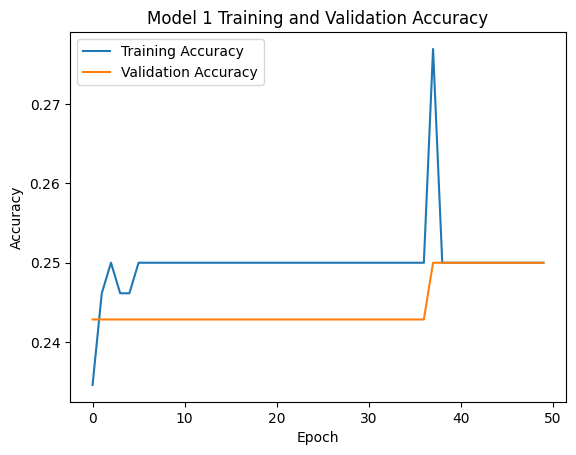

In [ ]:
import matplotlib.pyplot as plt

def plot_model_history(history, model_1):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_1} Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Plotting the training history for Model 1
plot_model_history(history_1, "Model 1")


**Model 2**

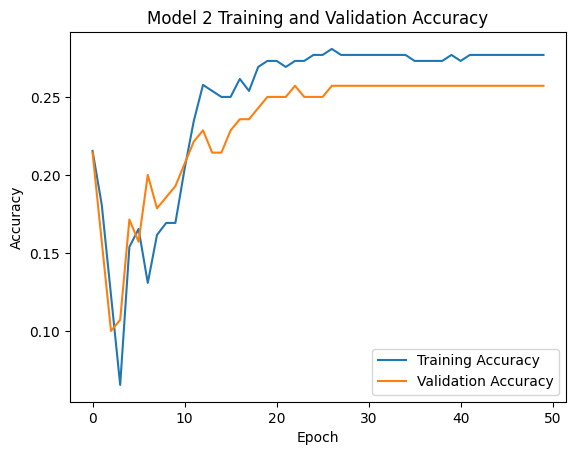

In [242]:
import matplotlib.pyplot as plt

def plot_model_history(history, model_2):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_2} Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Plotting the training history for Model 2
plot_model_history(history_2, "Model 2")


**Model 3**

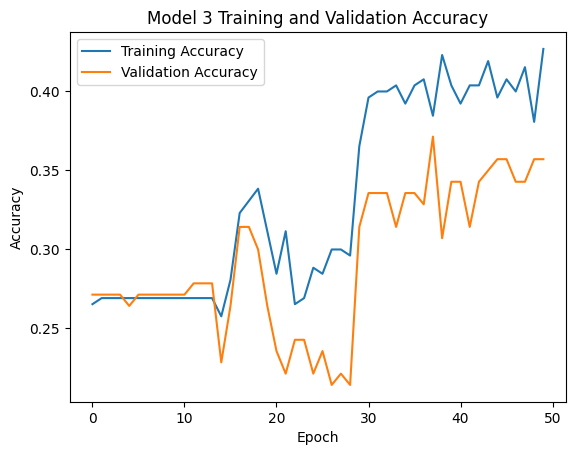

In [243]:
import matplotlib.pyplot as plt

def plot_model_history(history, model_3):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_3} Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Plotting the training history for Model 3
plot_model_history(history_3, "Model 3")


**Global Comparaison**

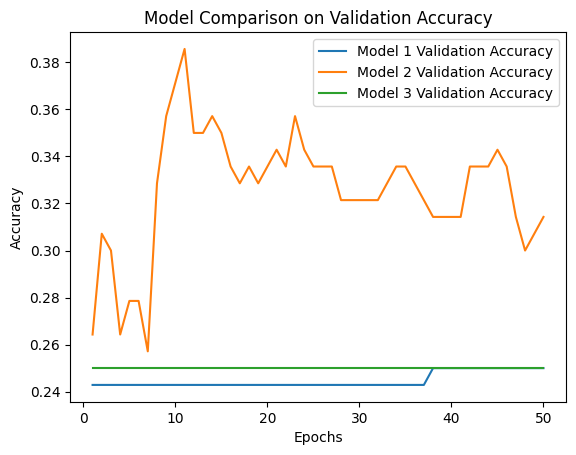

In [ ]:

# Define epochs range based on one of the history objects
epochs = range(1, len(history_1.history['accuracy']) + 1)

# Plot validation accuracy for each model
plt.plot(epochs, history_1.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(epochs, history_2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.plot(epochs, history_3.history['val_accuracy'], label='Model 3 Validation Accuracy')

# Adding graph title and labels
plt.title('Model Comparison on Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


### **Training Loss Analysis**

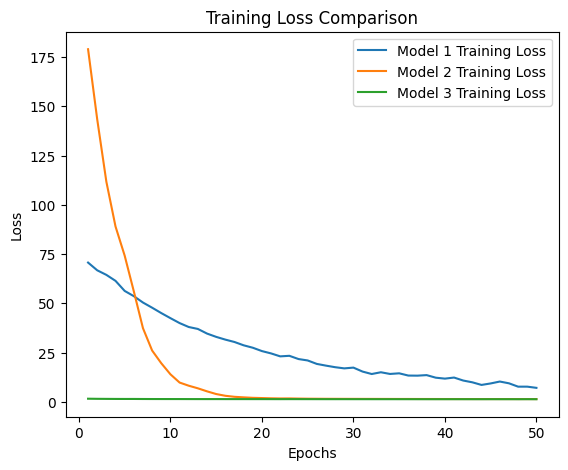

In [244]:
import matplotlib.pyplot as plt

# Define epochs range based on one of the history objects
epochs = range(1, len(history_1.history['loss']) + 1)

# Plot training and validation loss for each model
plt.figure(figsize=(14, 5))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_1.history['loss'], label='Model 1 Training Loss')
plt.plot(epochs, history_2.history['loss'], label='Model 2 Training Loss')
plt.plot(epochs, history_3.history['loss'], label='Model 3 Training Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### **Validation Loss Analysis**

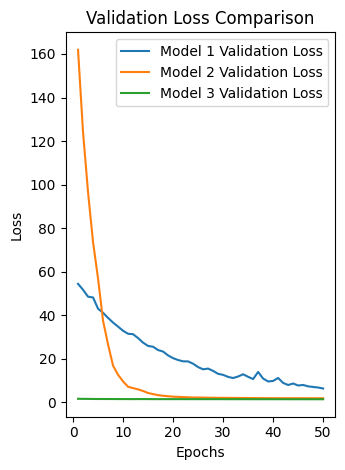

In [245]:
# Validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(epochs, history_2.history['val_loss'], label='Model 2 Validation Loss')
plt.plot(epochs, history_3.history['val_loss'], label='Model 3 Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Note: the Accuracy of my Models are very low, as the training loss. We have tried to improved the model many times - I hope to improve my model thanks to the correction for next project!